<a href="https://colab.research.google.com/github/VicenteLigiero/POS_PUC/blob/main/MVP_PUC_ML_%26_ANALYTICS_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# identificação de objetos - CNN

**Pós Gradução PUC-Rio**

**Aluno:** Vicente Ligiéro Neto

**Descrição:** CNN: Identificação de objetos

## Introdução

A detecção de objetos é um problema muito relevante na visão computacional. O modelo desenvolvido tem a tarefa de localizar os objetos presentes em uma imagem e, ao mesmo tempo, classificá-los em diferentes categorias.
Os modelos de detecção de objetos podem ser amplamente classificados em Um estágio e Dois estágios.
Os detectores de dois estágios costumam ser mais precisos, porém mais lentos. utilizarei a CNN, ela pode ser usada tanto para detecção de objetos como para identificação e localização.
Com a CNN é possível automatizar tarefas complexas de detecção e localização de objetos em imagens, abrindo caminho para diversas aplicações práticas.


**Referencias:**

- [Artigo CNN](https://lapix.ufsc.br/ensino/visao/visao-computacionaldeep-learning/deteccao-de-objetos-em-imagens/)
- [Artigo SERPRO](https://www.serpro.gov.br/menu/noticias/noticias-2020/o-que-eh-visao-computacional)
- [Artigo Embrapa](https://www.embrapa.br/busca-de-publicacoes/-/publicacao/1126261/visao-computacional-aplicada-na-agricultura)

- [Tutorial](https://ichi.pro/pt/tutorial-de-rede-neural-convolucional-cnn-em-python-usando-tensorflow-69459748079480)

## Importando as bibliotecas

In [2]:
# Importação
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Carregamento dos dados do CIFAR-10

O conjunto de dados CIFAR-10 consiste em 60000 imagens a cores 32x32 em 10 classes, com 6000 imagens por classe. Há 50000 imagens de treinamento e 10000 imagens de teste.

O conjunto de dados é dividido em cinco lotes de treinamento e um lote de teste, cada um com 10000 imagens. O lote de teste contém exatamente 1000 imagens selecionadas aleatoriamente de cada classe. Os lotes de treinamento contêm as imagens restantes em ordem aleatória, mas alguns lotes de treinamento podem conter mais imagens de uma classe do que de outra. Entre eles, os lotes de treinamento contêm exatamente 5000 imagens de cada classe.

In [3]:
# Carregar os dados do CIFAR-10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


## Pré-processamento das imagens

O conjunto de dados será dividido em um lote de treinamento, um lote de teste e um de validação.
O pré-processamento converterá o tipo de dados de ponto flutuante para 32 bits e normarlizar os intervalos entre 0 e 1.

In [4]:
# Normalização dos pixels para o intervalo [0, 1]

x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

# One-hot encoding dos rótulos

y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

## Dividir os dados em conjuntos de treino, validação e teste

A divisão irá gerar um lote de treino com 40000 imagens, um lote de validação com 10000 imagens e um lote de teste com 10000 imagens.

In [5]:
# Dividir os dados em conjuntos de treino, validação e teste

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Forma dos dados de treino:", x_train.shape, y_train.shape)

print("Forma dos dados de validação:", x_val.shape, y_val.shape)

print("Forma dos dados de teste:", x_test.shape, y_test.shape)

Forma dos dados de treino: (40000, 32, 32, 3) (40000, 10)
Forma dos dados de validação: (10000, 32, 32, 3) (10000, 10)
Forma dos dados de teste: (10000, 32, 32, 3) (10000, 10)


## Modelagem e escolha da CNN

Anchor boxes are fixed sized boxes that the model uses to predict the bounding
box for an object. It does this by regressing the offset between the location
of the object's center and the center of an anchor box, and then uses the width
and height of the anchor box to predict a relative scale of the object. In the
case of RetinaNet, each location on a given feature map has nine anchor boxes
(at three scales and three ratios).

### Modelagem

Importando as bibliotecas para construção de uma pilha linear em camadas sequencialmente de convolução 2D, definindo o pooling e o achatamento, transformando os dados em multidimensionais para conectar as camadas densas e regularizando para evitar overfitting.

In [6]:
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Definir a arquitetura do modelo CNN

In [7]:
model = Sequential()

### Adicionar camadas convolucionais e de pooling

In [9]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2)))

### Adicionar camadas totalmente conectadas (fully connected)

In [10]:
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

### Camada de saída

In [11]:
model.add(Dense(10, activation='softmax'))

### Compilar o modelo

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Resumo do modelo

Ela foi projetada para classificar dados em 10 classes diferentes.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

## Avaliação do modelo


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

### Treinar o modelo

In [15]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
313/313 [==============================] - 11s 14ms/step - loss: 1.7442 - accuracy: 0.3602 - val_loss: 1.4365 - val_accuracy: 0.4907
Epoch 2/20
313/313 [==============================] - 4s 12ms/step - loss: 1.3394 - accuracy: 0.5192 - val_loss: 1.0917 - val_accuracy: 0.6104
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 1.1462 - accuracy: 0.5952 - val_loss: 0.9956 - val_accuracy: 0.6576
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 1.0261 - accuracy: 0.6365 - val_loss: 0.8974 - val_accuracy: 0.6850
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.9411 - accuracy: 0.6723 - val_loss: 0.8259 - val_accuracy: 0.7080
Epoch 6/20
313/313 [==============================] - 4s 11ms/step - loss: 0.8720 - accuracy: 0.6945 - val_loss: 0.7960 - val_accuracy: 0.7243
Epoch 7/20
313/313 [==============================] - 3s 11ms/step - loss: 0.8054 - accuracy: 0.7161 - val_loss: 0.8157 - val_accuracy: 0.717

### Avaliar o modelo nos dados de teste

Podemos observar que o Loss e a Acurácia estão com paramêtros adequados, indicando que o modelo está com uma previsão confiável.

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Loss no conjunto de teste:", score[0])

print("Acurácia no conjunto de teste:", score[1])

Loss no conjunto de teste: 0.9169793725013733
Acurácia no conjunto de teste: 0.7468000054359436


### Plotar curvas de aprendizado (loss e acurácia)

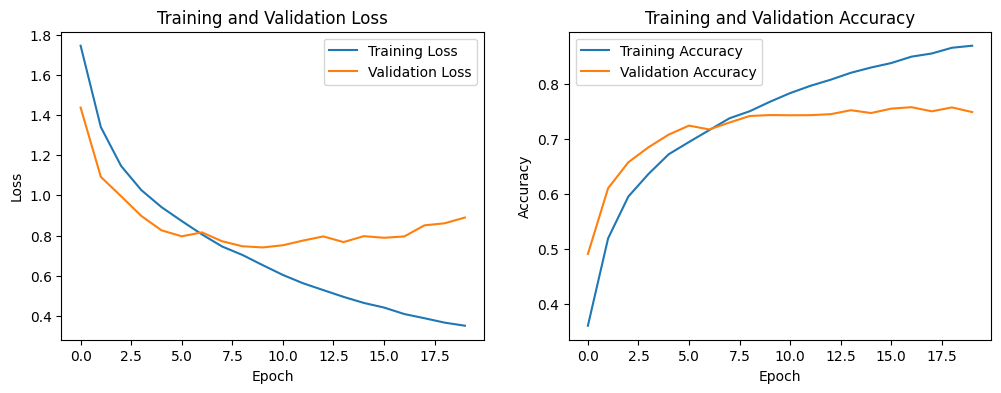

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Training and Validation Loss')

plt.legend()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.title('Training and Validation Accuracy')

plt.legend()

plt.show()

### Realizar previsões no conjunto de teste

In [18]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


### Avaliar precisão, recall e F1-score

Observando as métricas do modelo testado, a previsão do conjunto de teste está com paramêtros de pricision, recall e f1 que nos permite considerar o modelo confiável, as médias do modelo mostram o bom desempenho.

In [19]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.88      0.86      0.87      1000
           2       0.64      0.61      0.62      1000
           3       0.54      0.58      0.56      1000
           4       0.67      0.77      0.72      1000
           5       0.65      0.65      0.65      1000
           6       0.80      0.77      0.79      1000
           7       0.80      0.78      0.79      1000
           8       0.89      0.82      0.85      1000
           9       0.84      0.82      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



## Plotar matriz de confusão

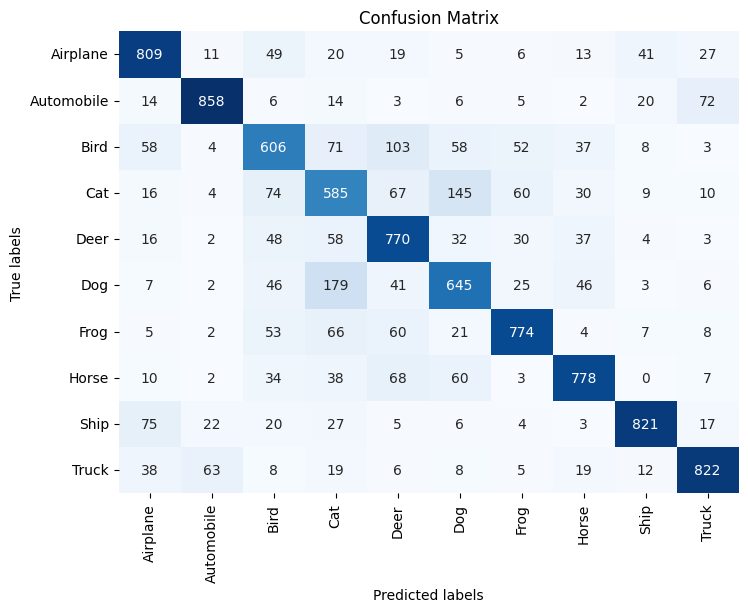

In [20]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,

            xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',

                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],

            yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',

                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

plt.xlabel('Predicted labels')

plt.ylabel('True labels')

plt.title('Confusion Matrix')

plt.show()


# Conclusão

A CNN se mostrou eficaz para o processamento das imagens, o modelo gerado fez a previsão de forma eficaz, demonstrando ser adequado para solução do problema em questão.